# Predicting the amount of gold mined through machine learning

A renewed mining company "Zyfra" asked us to develop a model capable to predict the amount of gold extracted from gold ore.

## Contents <a id='back'></a>

* [Intro](#intro)
* [Stage 1. Data loading](#1)
    * [1.1 Data exploration](#1.1)
* [Stage 2. Data preprocessing](#2)
* [Stage 3. Data analysis](#3)
* [Stage 4. Model building](#4)
* [Conclusion](#conclusion)

## Introduction <a id='intro'></a>

We have data of extraction and purification of gold ore. The aim is to develop a model that optimizes production and eliminate unprofitable parameters. Steps will be the following:
<ul>
  <li>Preprocess the data and verify that the recovery calculations are correct.</li>
  <li>Analyze the data by exploring the metal distributions and feed particle size.</li>
  <li>Create a predictive model to establish the amount of gold extracted from the gold ore, taking into account the waste and concentrates produced at each stage of the process.</li>
  <li>Train different models and evaluate them using the sMAPE (symmetric mean absolute percentage error) metric and cross-validation.</li>
</ul>

## Stage 1. Data loading <a id='1'></a>

In [1]:
# General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
# Load the data files into DataFrame
try:
    df_train = pd.read_csv('gold_recovery_train.csv')
    df_test = pd.read_csv('gold_recovery_test.csv')
    df_full = pd.read_csv('gold_recovery_full.csv')
except:
    df_train = pd.read_csv('/dataset/gold_recovery_train.csv')
    df_test = pd.read_csv('/dataset/gold_recovery_test.csv')
    df_full = pd.read_csv('/dataset/gold_recovery_full.csv')

### 1.1 Data exploration <a id='1.1'></a>

In [3]:
# printing the general/summary information and first rows of df_train
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
# printing the general/summary information and first rows of df_test
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
# printing the general/summary information and first rows of df_test
df_full.info()
df_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
print('df_train shape:', df_train.shape)
print('df_test shape:', df_test.shape)
print('df_full shape:', df_full.shape)

df_train shape: (16860, 87)
df_test shape: (5856, 53)
df_full shape: (22716, 87)


So, in general we have data about the metal concentration at various stage of the process. There are three datasets. One for training, one for testing and the last one, df_full, is the merge of the two. The number of rows of df_full is the sum of df_train and df_test. The number of columns of df_full isn't the simple sum because many columns are repeated in the two, while others can stay in one but missing in the other.

Now, we have to check that the feature 'rougher.output.recovery' is well calculated. Using the training set, we calculate our recovery that we will call 'rougher.output.recovery.calculated'. After, we find the mean absolute error (or MAE) between the two.

To get the recovery we use this formula:

$$
Recovery = \frac { C * (F-T))} { F * (C - T)} * 100\%
$$

Where:
- C is the gold concentration just after flotation
- F is the gold concentration in the feed before flotation
- T is the gold concentration in the rougher tail after flotation

In [7]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

In [8]:
df_train['rougher.output.recovery.calculated'] = 100*(C*(F-T))/(F*(C-T))

In [9]:
MAE = (df_train["rougher.output.recovery.calculated"] - df_train["rougher.output.recovery"]).abs().sum() / len(df_train)
print("MAE", ":", MAE)

MAE : 9.087511289144426e-15


So, MAE is pretty low. This means that the feature 'rougher.output.recovery' is well calculated.

## Stage 2. Data preprocessing <a id='2'></a>

Every dataframe have many missing values. We have to find a way to properly fill the null values in df_train, df_test and df_full. Since the data has a gradual change over time, it may be more appropriate to use ffill. This, propagates the last valid observation forward along the selected axis

Anyway, if the missing values were scattered or if there were more complex patterns in the data, interpolate could be a better choice.

In [10]:
df_train.ffill(inplace=True)
df_test.ffill(inplace=True)
df_full.ffill(inplace=True)

Let's see what features are found in the train set but not in the test set:

In [11]:
print(df_train.columns.difference(df_test.columns))
print()
print(len(df_train.columns.difference(df_test.columns)), 'columns in total')

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

To facilitate following calculations, let's take some columns of df_full and merge them to df_test using date as common value:

In [12]:
df_full_merge = df_full[['date', 'rougher.output.recovery', 'final.output.recovery', 
                         'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 
                         'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']]

In [13]:
df_test = df_test.merge(df_full_merge, on='date', how='left')

Let's now keep only the column of df_train that are in df_test as well:

In [14]:
df_train = df_train.loc[:, list(df_test.columns)]

## Stage 3. Data analysis <a id='3'></a>

Now we observe how the concentration of gold, silver and lead (Au, Ag, Pb) changes based on the purification step.

<img src='gold process.png' style='width:400px; height:400px' title='purification steps'>

In [15]:
metals = ['au', 'ag', 'pb']
cols = ['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']

au = df_full[[f"{col}_au" for col in cols]]
ag = df_full[[f"{col}_ag" for col in cols]]
pb = df_full[[f"{col}_pb" for col in cols]]

In [16]:
au.head()

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141


Of course, the concentration of gold increases through the process.

In [17]:
ag.head()

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,6.100378,11.500771,8.547551,6.055403
1,6.161113,11.615865,8.558743,6.029369
2,6.116455,11.695753,8.603505,6.055926
3,6.043309,11.915047,7.221879,6.047977
4,6.060915,12.411054,9.089428,6.148599


This last is not obvious. The trend is not linear but anyway the final concentration of silver is slightly lower than the beginning.

In [18]:
pb.head()

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
0,2.284912,7.101074,10.389648,9.889648
1,2.266033,7.278807,10.497069,9.968944
2,2.159622,7.216833,10.354494,10.213995
3,2.037807,7.175616,8.496563,9.977019
4,1.786875,7.240205,9.986786,10.142511


For lead, its final concentration at the end is around 5 times higher than the beginning.

Let's plot some graphs that show the concentrations during the steps:

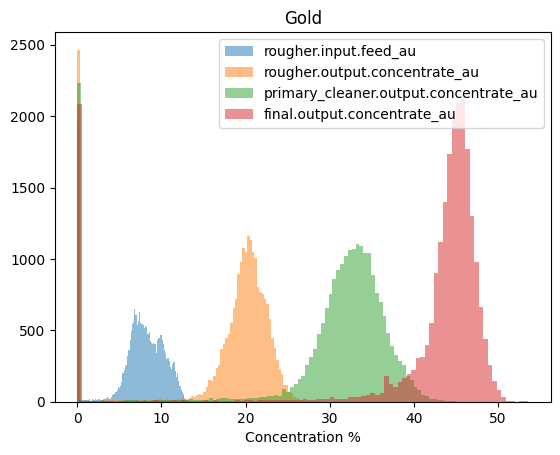

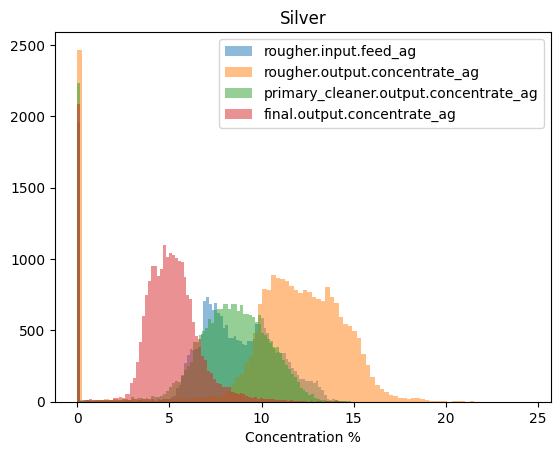

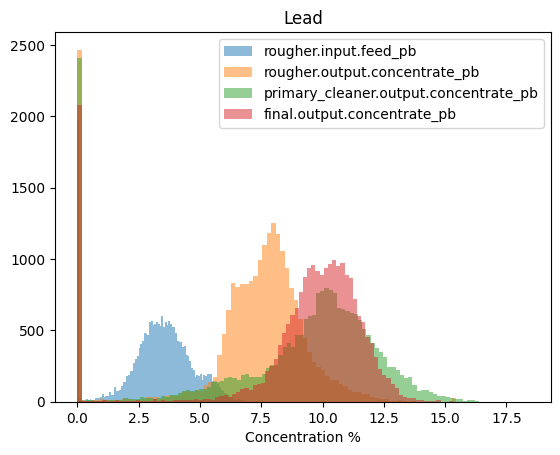

In [19]:
metals = [au, ag, pb]
metal_list = ['Gold', 'Silver', 'Lead']
i=0

for metal in metals:
    for column in list(metal):
        plt.hist(metal[column], bins=100, alpha=0.5)
        plt.title('{}'.format(metal_list[i]))
        plt.xlabel('Concentration %')
        plt.legend(list(metal))
    i+=1
    plt.show()

Let's now compare the particle size distributions of the feed in the training set and the test set. If the distributions vary significantly, the model evaluation will not be correct.

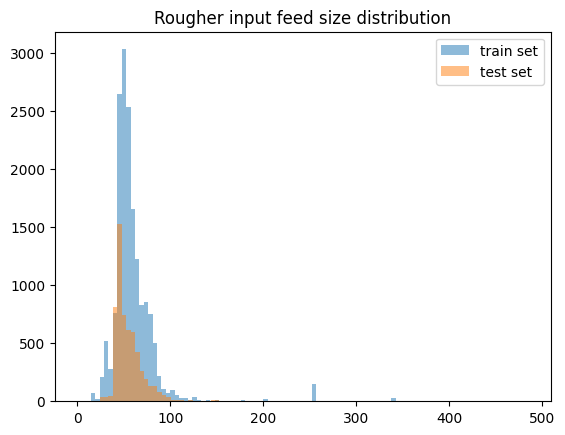

In [20]:
plt.hist(df_train['rougher.input.feed_size'], bins=100, alpha=0.5, label="train set")
plt.hist(df_test['rougher.input.feed_size'], bins=100, alpha=0.5, label="test set")
plt.title("Rougher input feed size distribution")
plt.legend(loc='upper right')
plt.show()

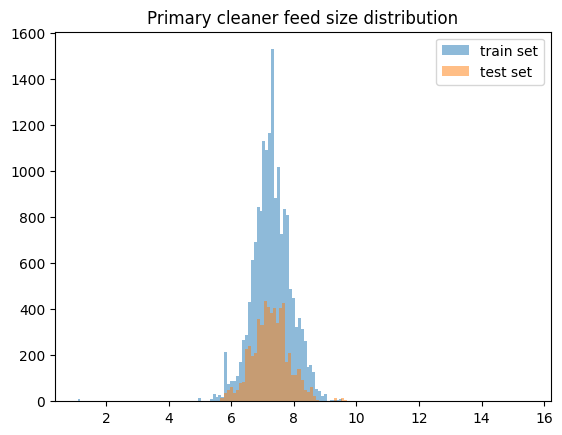

In [21]:
plt.hist(df_train['primary_cleaner.input.feed_size'], bins=100, alpha=0.5, label="train set")
plt.hist(df_test['primary_cleaner.input.feed_size'], bins=100, alpha=0.5, label="test set")
plt.title("Primary cleaner feed size distribution")
plt.legend(loc='upper right')
plt.show()

So, in both steps (rougher input and primary cleaner) the particle size distribution are similar. This means that the model evaluation should work.

Now, we have to consider the total concentrations of all metals at different stages: 
- raw feed — `rougher.input.feed`
- rougher concentrate — `rougher.output.concentrate`
- final concentrate — `final.output.concentrate`

Do we observe any abnormal values in the total distribution? If so, is it worth removing those values from both samples? We have to describe the results and eliminate anomalies.

In [22]:
def raw_feed(df):
    return df["rougher.input.feed_au"] + df["rougher.input.feed_ag"] + df["rougher.input.feed_pb"] + df["rougher.input.feed_sol"]

def rougher_conc(df):
    return df["rougher.output.concentrate_au"] + df["rougher.output.concentrate_ag"] + df["rougher.output.concentrate_pb"] + df["rougher.output.concentrate_sol"]

def final_conc(df):
    return df["final.output.concentrate_au"] + df["final.output.concentrate_ag"] + df["final.output.concentrate_pb"] + df["final.output.concentrate_sol"]

In [23]:
df_full["rougher.input.feed"] = raw_feed(df_full)
df_full["rougher.output.concentrate"] = rougher_conc(df_full)
df_full["final.output.concentrate"] = final_conc(df_full)
total_conc = df_full[["rougher.input.feed", "rougher.output.concentrate", "final.output.concentrate"]]

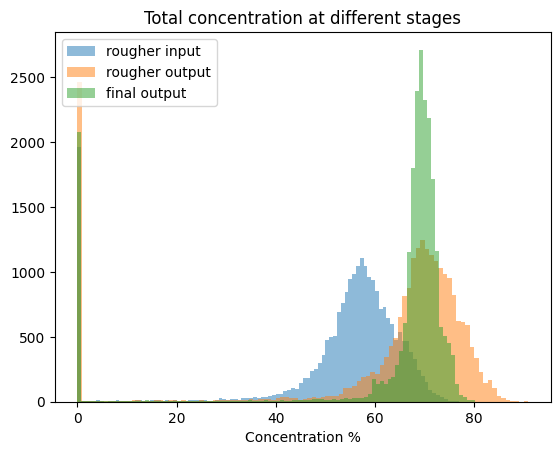

In [24]:
plt.hist(df_full['rougher.input.feed'], bins=100, alpha=0.5, label="rougher input")
plt.hist(df_full['rougher.output.concentrate'], bins=100, alpha=0.5, label="rougher output")
plt.hist(df_full['final.output.concentrate'], bins=100, alpha=0.5, label="final output")
plt.title("Total concentration at different stages")
plt.xlabel('Concentration %')
plt.legend(loc='upper left')
plt.show()

So, the total concentration through the various steps seems reasonable. There are however some abnormal values at the far left. Maybe it is better if we select only certain values.

In [25]:
# selecting only values above 20%
df_full = df_full[(df_full["rougher.input.feed"] > 20) & (df_full["rougher.output.concentrate"] > 20) & (df_full["final.output.concentrate"] > 20)]

We should do the same for the train set (df_train) and test set (df_test):

In [26]:
df_train["rougher.input.feed"] = raw_feed(df_train)
df_train["rougher.output.concentrate"] = rougher_conc(df_train)
df_train["final.output.concentrate"] = final_conc(df_train)

# selecting only values above 20%
df_train = df_train[(df_train["rougher.input.feed"] > 20) & (df_train["rougher.output.concentrate"] > 20) & (df_train["final.output.concentrate"] > 20)]

In [27]:
df_test["rougher.input.feed"] = raw_feed(df_test)
df_test["rougher.output.concentrate"] = rougher_conc(df_test)
df_test["final.output.concentrate"] = final_conc(df_test)

# selecting only values above 20%
df_test = df_test[(df_test["rougher.input.feed"] > 20) & (df_test["rougher.output.concentrate"] > 20) & (df_test["final.output.concentrate"] > 20)]

## Stage 4. Model building <a id='4'></a>

First step we have to accomplish is writing a function to get the final symmetric mean absolute percentage error (sMAPE). This is used to measure the predictive accuracy of models.

$sMAPE= \frac{1}{N} \sum_{i=1}^{N} \frac {|y_i-\hat{y_i}|}{(|y_i|+|\hat{y_i}|)/2} \times 100\% $

$Final\hspace{0.2cm}sMAPE = 25\% \times sMAPE(rougher) + 75\% \times sMAPE(final)$

Where:


$y_i$: The target value for the observation with index i in the sample used to measure quality.


$\hat{y_i}$: The prediction value for the observation with index i, for example, in the test sample.


N: The number of observations in the sample.

In [28]:
def smape(y_valid, y_pred):
    i=0
    j=0
    count=0
    
    for i in range(len(y_pred)):
        if (np.abs(y_valid[i]) + np.abs(y_pred[i]))!=0:
            count += 2 * np.abs(y_pred[i]-y_valid[i]) / (np.abs(y_valid[i]) + np.abs(y_pred[i]))*100
            j+=1
    return count/j

In [29]:
def smape_final(y_valid, y_pred):
    smape_rougher = smape(y_valid[0], y_pred[0])
    smape_final = smape(y_valid[1], y_pred[1])
    return 0.25 * smape_rougher + 0.75 *smape_final

We aim to predict two values:
- rougher recovery concentration— `rougher.output.recovery`
- final recovery concentration— — `final.output.recovery`

We do this, training different models and assessing them with cross validation. Once we get the best model, we will test it with the test set.

In [30]:
X_train = df_train.drop(columns=["date", "rougher.output.recovery", "final.output.recovery"], axis=1)
Y_train = df_train[["rougher.output.recovery", "final.output.recovery"]]

X_test = df_test.drop(columns=["date","rougher.output.recovery", "final.output.recovery"], axis=1)
Y_test = df_test[["rougher.output.recovery", "final.output.recovery"]]

In [31]:
# declaring 'state' to have a constant random state 
state = np.random.RandomState(12345)

In [34]:
best_smape_score_tree = 20
best_smape_score_forest = 20
best_depth = 0
best_est = 0

for subtrain_index, valid_index in KFold(n_splits=5).split(X_train):
    X_subtrain = X_train.iloc[subtrain_index].reset_index(drop=True)
    X_subvalid = X_train.iloc[valid_index].reset_index(drop=True)
    
    Y_subtrain = Y_train.iloc[subtrain_index].reset_index(drop=True)
    Y_subvalid = Y_train.iloc[valid_index].reset_index(drop=True)
    
    Y_subvalid.columns = [0, 1]
    
    for depth in range(2, 8, 2):
        model_tree = DecisionTreeRegressor(max_depth=depth, random_state=state)
        model_tree.fit(X_subtrain, Y_subtrain)
    
        pred_tree = model_tree.predict(X_subvalid)
    
        pred_tree = pd.DataFrame(pred_tree)
    
        smape_score_tree = smape_final(Y_subvalid, pred_tree)
        if smape_score_tree<best_smape_score_tree:
            best_smape_score_tree = smape_score_tree
            best_depth = depth

    for est in range(40, 100, 50):
        model_forest = RandomForestRegressor(n_estimators=est, random_state=state)
        model_forest.fit(X_subtrain, Y_subtrain)
        
        pred_forest = model_forest.predict(X_subvalid)
        
        pred_forest = pd.DataFrame(pred_forest)
        
        smape_score_forest = smape_final(Y_subvalid, pred_forest)
        if smape_score_forest<best_smape_score_forest:
            best_smape_score_forest = smape_score_forest
            best_est = est
    
    model_regr = LinearRegression()
    model_regr.fit(X_subtrain, Y_subtrain)
    pred_regr = model_regr.predict(X_subvalid)
    pred_regr = pd.DataFrame(pred_regr)
    smape_score_regr = smape_final(Y_subvalid, pred_regr)


print("Decision Tree")
print('Lowest sMAPE = {:.2f} || depth = {}' .format(best_smape_score_tree, best_depth))
print()
print('Random Forest')
print('Lowest sMAPE = {:.2f} || estim = {}' .format(best_smape_score_forest, best_est))
print()
print('Linear Regression')
print('Lowest sMAPE = {:.2f}' .format(smape_score_regr))

Decision Tree
Lowest sMAPE = 7.97 || depth = 2

Random Forest
Lowest sMAPE = 7.44 || estim = 40

Linear Regression
Lowest sMAPE = 14.26


So, the best model in our case is RandomForestRegressor with estim=40. 

Lets now proceed to perform the sanity check of our model, for which we will compare it with a constant model that always predicts the same response. We will develop a Dummy model that will generate predictions for the rougher concentrate and final concentrate filled with the mean value of each target.

In [ ]:
Y_test.columns = [0, 1]
constant_model_mean = Y_test.mean()
constant_model_test = pd.DataFrame(index=range(len(Y_test)),columns=[0, 1])
constant_model_test[0] = constant_model_mean[0]
constant_model_test[1] = constant_model_mean[1]

In [33]:
Y_test.reset_index(inplace = True, drop = True)
constant_smape = smape_final(constant_model_test, Y_test)
print("Constant model sMAPE:", constant_smape.round(2))

Constant model sMAPE: 6.99


We see that the constant model is around 7 which is very close and indicates that the machine learning model is not significantly better than the constant model predicting the mean.

## Conclusion <a id='conclusion'></a>

We started our project with the aim of developing a model capable to predict the amount of gold extracted from gold ore. 

Zyfra provided us with 3 datasets (df_train, df_test, df_full) with info about the metal concentration through the extraction process. Our final targets were "rougher.output.recovery" and "final.output.recovery".

First step was to load and verify our data. There were a lot of missing values in every dataset, which we solved with a linear interpolation.

We checked if the feature "rougher.output.recovery" was reliable. We did this, getting our 'rougher.output.recovery.calculated' using the formula above and comparing the values with the mean absolute error (MAE). It looked good.

After, we merged some columns in df_test that were missing, using 'data' as a pivot.

We analysed how gold, silver and lead concentration varied through the process.

We checked if the particle size distribution ('rougher.input.feed_size' and 'primary_cleaner.input.feed_size') were similar for the df_train and df_test. They were!

We studied if there were anomalies about the total metals concentration through the process. Indeed, there were and we discarded them.

We found that the best model observed is using the RandomForestRegressor at 40 estim. The final sMAPE found is 7.44%.

Finally we run a sanity check and find out that the constant model predicting the mean is also better than any of the other models tested.